## Remote access to the computing machine

Very often, in fact always, we do not have direct access to the machine on which the calculations are performed.
The Google Colaboratory environment (Google Colab) provides access to virtual machines somewhere in cyberspace.
Virtual machines are brought to life for each user, so the ``Merging`` stage requires a macroscopic amount of time.

However, it is rare that centers providing computing power, such as ICM, also provide a convenient environment like Colab. Usually the user has to follow a few steps to have analogous functionality:

1) connecting to a remote machine,
2) starting a service like *Jupyter Server*,
3) connecting to the service from a local computer - a terminal

## Connecting to a remote machine

In any self-respecting computer center, devices on the internal computer network (Local Area Netowrk, LAN) are isolated from the Wide Area Network (WAN), the entire Internet.

The LAN is accessed through an access computer - a gateway. In the case of students at the Department of Physics, this is
```Bash
tempac.okwf.fuw.edu.pl
```

After logging in to the access computer, you can log in further to the computer that provides computing power, such as
the computers from the lab, e.g.:
```Bash
pracownia.okwf.fuw.edu.pl
```


**Please:**

* log in to the `pracownia` (*laboratory* in english) computer directly - this should not be possible from the `FUW.open` network
* log on to the `tempac` computer, and then to the `pracownia` computer

Instructions:

* Linux - open a terminal window
* Windows - applications -> search -> cmd

Use the `ssh` command in the terminal window:  
  ```Bash
  ssh login@tempac.okwf.fuw.edu.pl
  ```

and after logging on 'tempac' once again use:

  ```Bash
  ssh login@pracownia.okwf.fuw.edu.pl
  ```

After logging in, you can start the appropriate service. Of course, such a two-step login is very inconvenient.
You can make it easier by using network tunneling. To do this, you need to add the appropriate entry to the 'ssh' configuration
( thesame location on both Linux and Windows):
```Bash
.ssh/config
```

If there is no such file in the user's directory, create one. In the `config` file we place blocks that configure access to remote machines. In the case of the laboratory, such a block should look as follows:
```Bash
Host pracownia
     ForwardX11 yes
     ForwardAgent yes
     UserKnownHostsFile ~/.ssh/known_hosts
     Hostname pracownia.okwf.fuw.edu.pl
     LocalForward 8888 localhost:8888
     RequestTTY yes
     ProxyJump YOUR_LOGIN_ON_TEMPAC@tempac.okwf.fuw.edu.pl:22
     #RemoteCommand ./runSingularity.sh
     User YOUR_LOGIN_ON_TEMPAC
```

**Please:**

* modify your `.ssh/config` file and add an entry for the `pracownia` computer
* log in to the `pracownia`computer:
  ```Bash
  
  ssh pracownia
  ```

**Please:**

* start the container containing the environment prepared for our classes:
```Shell
~akalinow/Publiczny/UczenieMaszynoweII/ml_lecture
```
* in the container start the jupyter server:
```Shell
jupyter lab --no-browser --ip=0.0.0.0 --notebook-dir=$HOME
```
* open a Jupyter window on the local machine using the URL listed in the window where the server was started, e.g:
```Shell
http://127.0.0.1:8888/lab?token=e7862a89b9fe602cb31391359f8516376
```

**Note 1:** please pay attention to the address - you need to use the IP address of the local computer: `127.0.0.1.`.
ccess via the IP or DNS address of the remote computer, ```pd100.odk.fuw.edu.pl``` will only work if you connect from a computer
on the same LAN as the ```pd100``` computer, that is the FUW internal network, for example.

**Note 2:** computers ```pracownia```  are not suitable for training machine learning models. The steps above serve as training only.

**Note 3:** analogous access can be obtained with the ```Remote explorer``` plug-in for Visual Studio.

Development environment: the Python interpreter and the necessary libraries can be installed independently.
A much more convenient option are containers - sets of software, including the operating system, which can be run on any machine
 and get a well-defined working environment.

1) Installation of container management software: [Docker](https://docs.docker.com/)
2) launching a specific container


# Homework

**Please:**

* people with Windows laptops:: install [Docker Desktop application](https://docs.docker.com/desktop/install/windows-install/)
* people with Linux laptops: install [Docker Engine application](https://docs.docker.com/engine/install/ubuntu)
* after installation, please run the `hello_world` test container
  (Windows - please open shell window: `power shell` and skip `sudo` command)::
  ```Shell
  sudo docker run hello-world
  ```

Expected result:

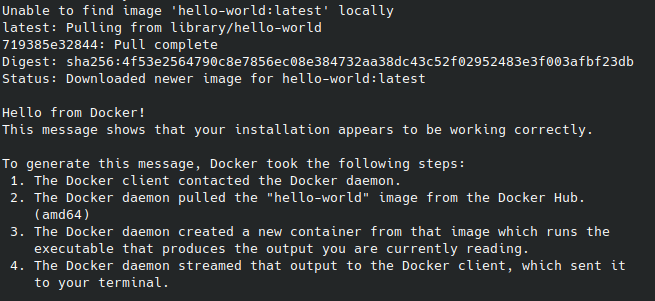

# A container prepared for the class

A container containing the necessary Python packages and Jupyter server has been prepared for the lecture.


**Please:**

* download and run the [akalinow/ml_lecture](https://hub.docker.com/repository/docker/akalinow/ml_lecture/general) container


Linux:

```
sudo docker run --name ml_lecture --rm -e DISPLAY=$DISPLAY  -v /home/$USER:/scratch -v /tmp/.X11-unix:/tmp/.X11-unix:ro  -w /home/jupyter -p 8000:8000 akalinow/ml_lecture /home/jupyter/start-jupyter.sh
```

Windows:
```
mkdir %USERPROFILE%\Docker
docker pull akalinow/ml_lecture
docker run --name ml_lecture -v %WORKING_DIR%:/scratch -w /home/jupyter -p 8000:8000 akalinow/ml_lecture /home/jupyter/start-jupyter.sh
```

Expected result:

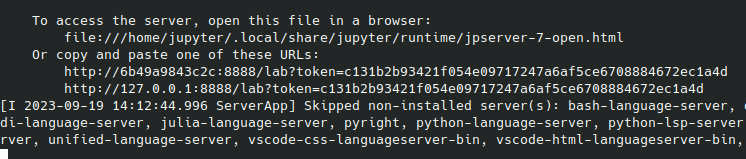

<br></br>

**Note 1:** using the GPU on a local computer requires a few extra steps. If you are interested, please contact me.

**Note 2:** on Linux machines, I recommend using [apptainer](https://apptainer.org/getting-started) instead of Docker. You can also run containers built with Docker in apptainer


**Please:**

* open the URL of the Jupyter Server from your local machine
* download notebook `01a_Python_refresher.ipynb` to your local computer
* run all the cells in the notebook on your local computer

Jupyter notebooks can also be run in Visual Studio.
You can use the kernel provided by the container as the execution kernel:

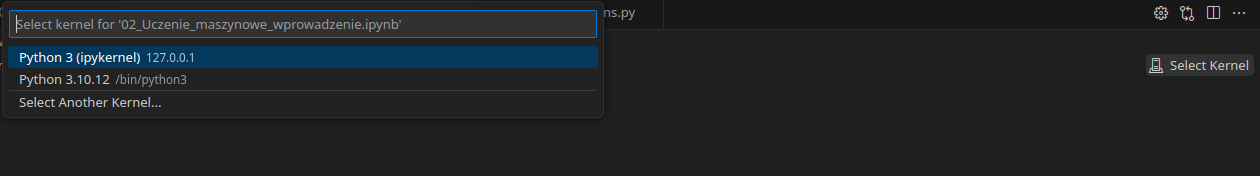

This way we have:

* advantages from using Visual Studio - a large number of useful plugins, autocomplete (`dumb` and `AI`)
* advantages from using the container - avoiding manual installation of required packages